# Business Case:-

#### Based on given features we need to find whether an employee will leave the company or not.

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the data
data=pd.read_csv('HR.csv')

## Basic Checks

In [3]:
data.head()#first five rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
## Getting all columns form the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# we do not have any null values
# we have 2 constant features Employee count and standardhours

In [8]:
data.describe(include=['O'])#It will give you info about categorical data/columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
# No null values
# Over18 is constant feature.

## Exploratory Data Analysis

In [10]:
# Task:- Perform Univariate and Bivariate analysis and get the insights from the data.

### continuous variables

In [11]:
data_numerical = data.select_dtypes(include=['int64'])
data_numerical


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [12]:
data3=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]#continuous variables/columns

# Data Preprocessing

### <font color='red'> Handling missing values </font> 

In [13]:
data.isnull().sum()#null value checking
# no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


### <font color='red'> Handling Categorical features </font> 

In [14]:
data_cat = data.select_dtypes(include=['object'])
data_cat


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [15]:
## Categorical data conversion
data_cat.head(2)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No


###  1.Attrition

In [16]:
data.Attrition.value_counts()#checking unique value in Attrition column

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [17]:
## Manual encoding Attrition feature
data.Attrition=data.Attrition.map({'Yes':1,'No':0})
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###  2.BusinessTravel

In [18]:
data.BusinessTravel.unique()#checking unique value

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [19]:
data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [20]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has quited the job so let do the
##manual encoding
data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})


In [21]:
data.BusinessTravel#checking whether imputation properly done or not

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

### 3.Department

In [22]:
data.Department.value_counts()#unique values

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [23]:
data.Department=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})#imputation using map function

In [24]:
data.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


### 4.EducationField

In [25]:
 data.EducationField.unique()#unique labels

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [26]:
 data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [27]:
#using map function
data.EducationField=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })

In [28]:
data.head()#checking for imputation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
data.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

### 5.Gender

In [30]:
#data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
#data['Gender_Male'] = data['Gender_Male'].astype(int)

In [31]:
df1 = pd.get_dummies(data['Gender'],dtype = 'int',prefix='Gender',drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender_Male  1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [32]:
data = pd.concat([data,df1],axis=1).drop('Gender',axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### JobRole

In [34]:
data.JobRole.value_counts()#checking count for each label

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [35]:
## Encoding JobRole
data.JobRole=data.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                              'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0 })

In [36]:
data.JobRole #data.JobRole #checking whether imputation done or not


0       7
1       6
2       8
3       6
4       8
       ..
1465    8
1466    2
1467    3
1468    7
1469    8
Name: JobRole, Length: 1470, dtype: int64

### Encoding MaritalStatus using label encoding


In [37]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [38]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn

label = LabelEncoder()#object creation
data.MaritalStatus=label.fit_transform(data.MaritalStatus)#applying label encoder to  marital status

In [39]:
data.MaritalStatus.value_counts()

MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64

### OverTime

In [40]:
data.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [41]:
## Encoding OverTime
data.OverTime=label.fit_transform(data.OverTime)    #label encoding

In [42]:
data.OverTime.value_counts()
#checking for imputation

OverTime
0    1054
1     416
Name: count, dtype: int64

In [43]:
# Since we are using DT and DT is robust to outliers and doesnot require scaling.
# Only conversion of categorical data and missing values should be handled.

## Feature Selection

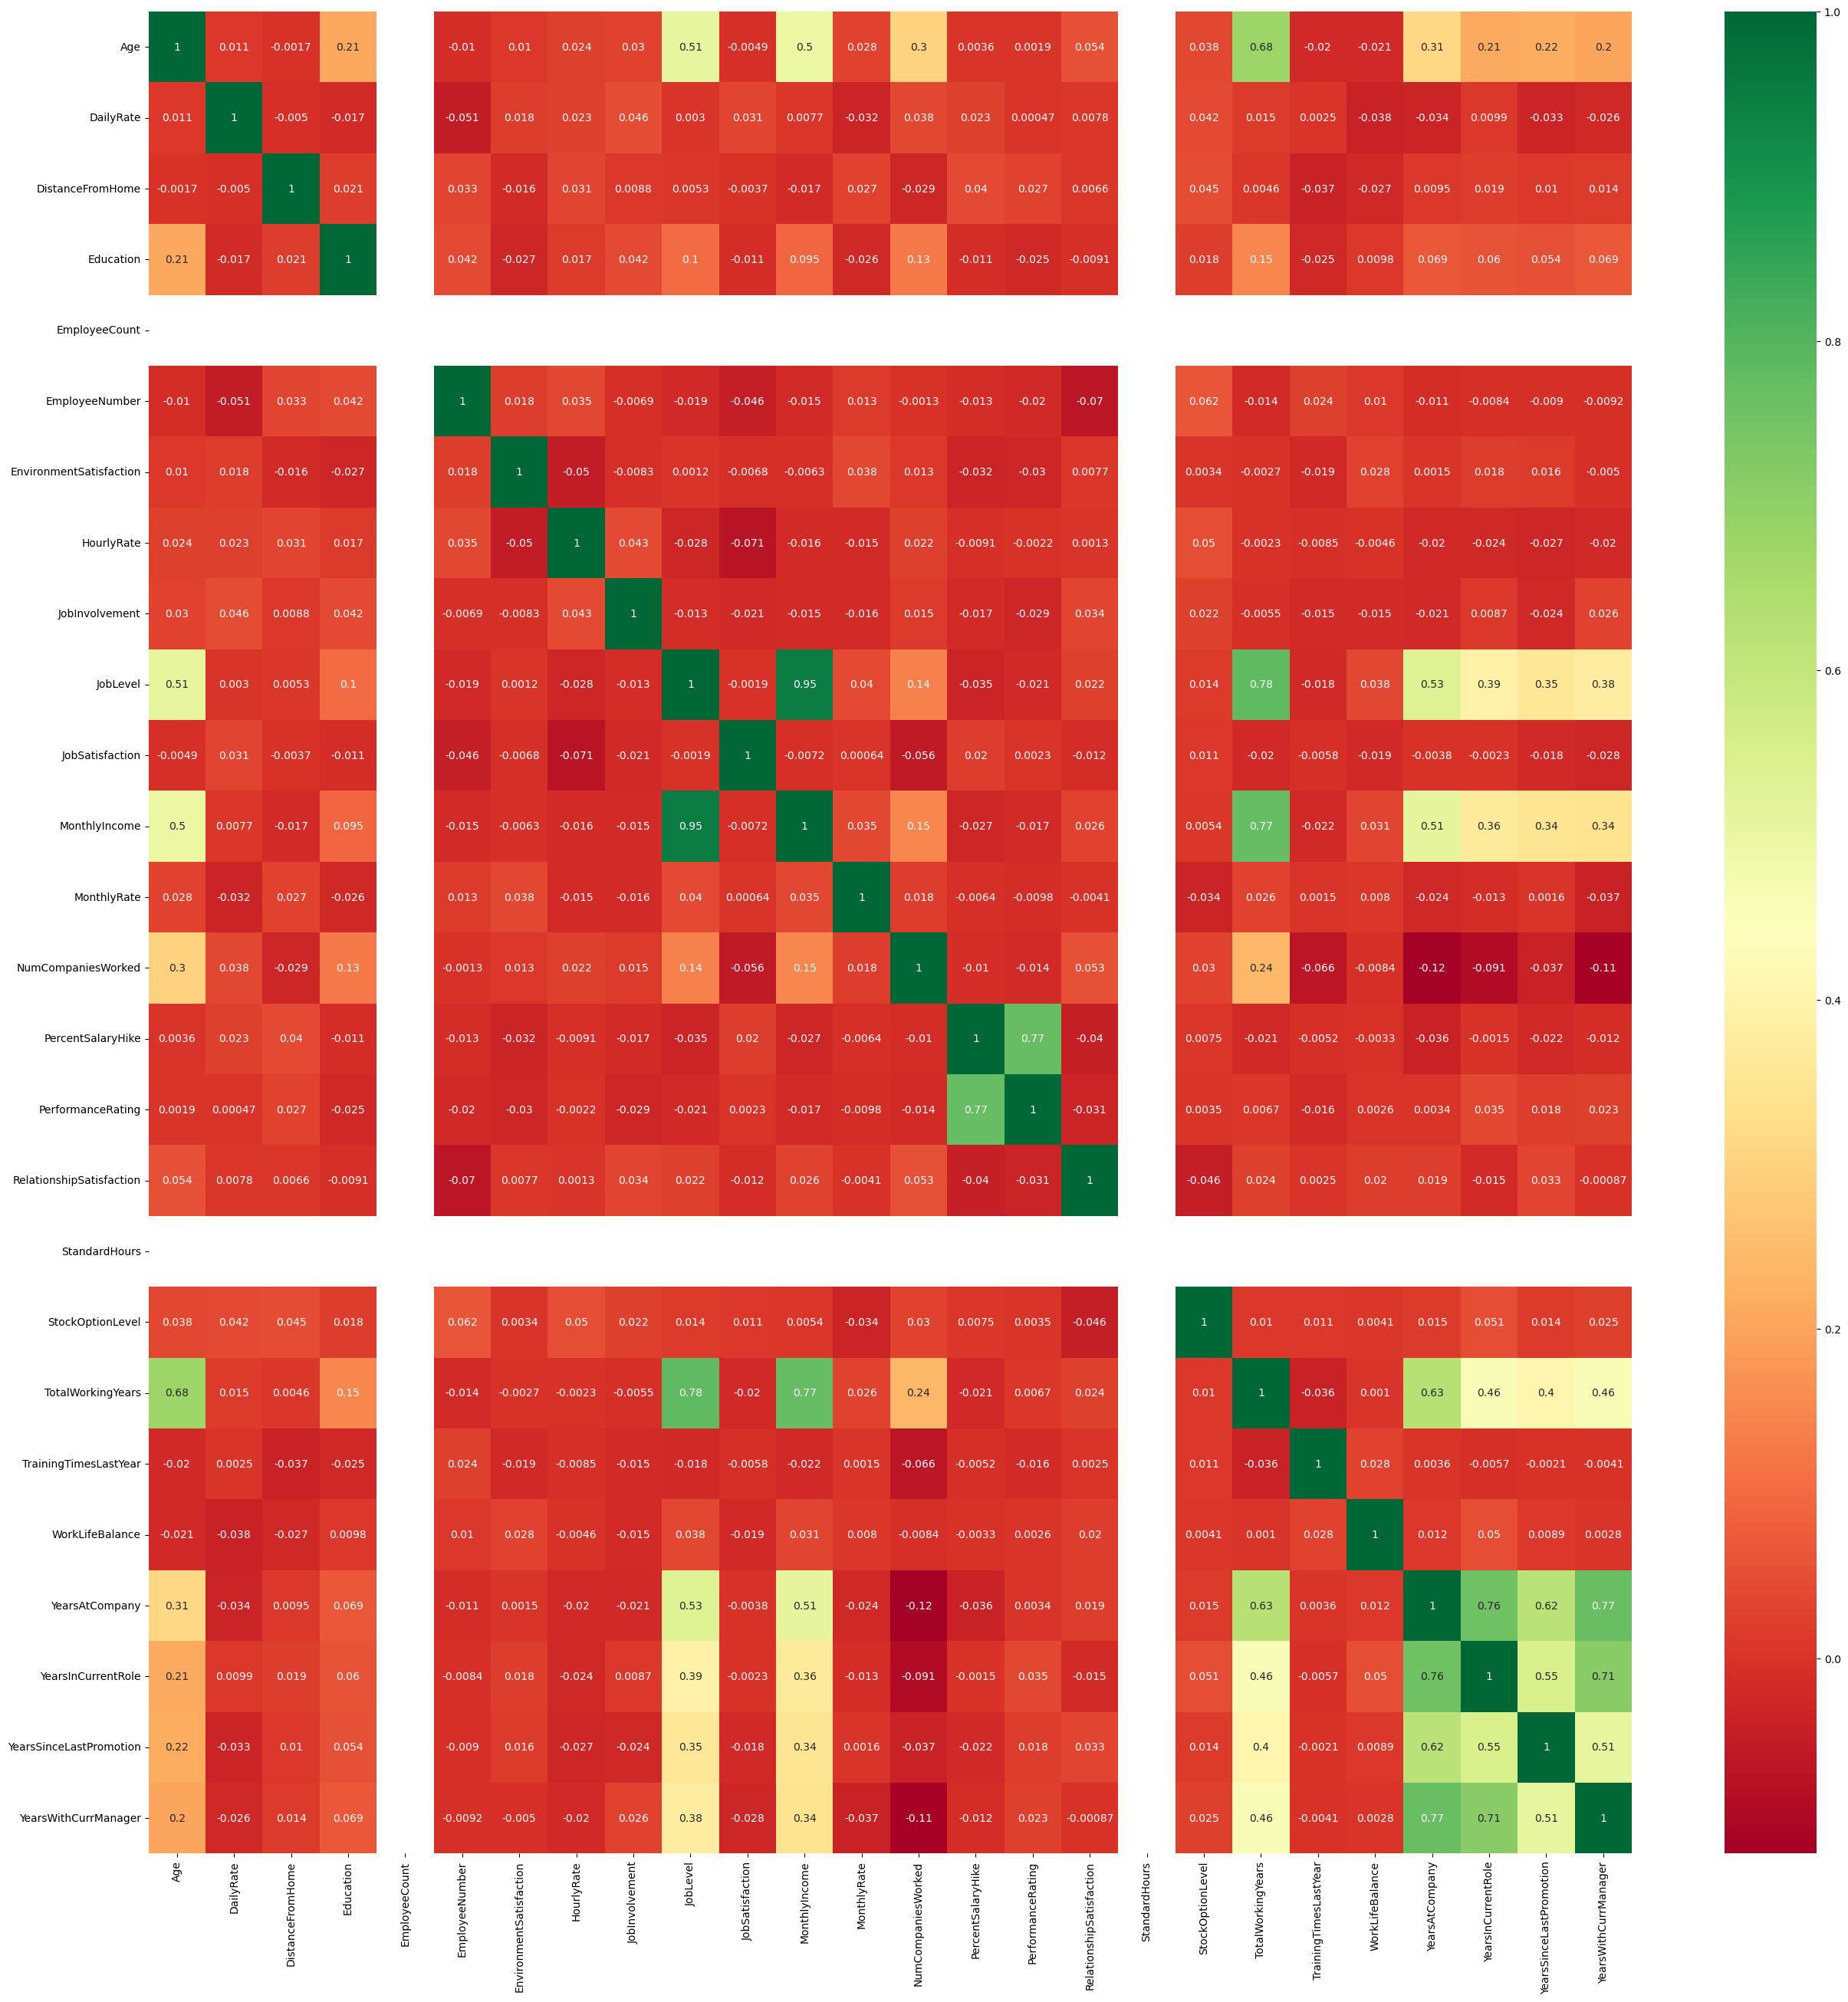

In [44]:
## Checking correlation

cols = len(data_numerical.columns)

plt.figure(figsize=(cols*1.2, cols*1.2))   # auto-adjust
sns.heatmap(data_numerical.corr(),
            annot=True,
            cmap="RdYlGn",
            annot_kws={"size":10})
plt.show()



In [45]:
data.describe().loc['std']==0
#data.Over18

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount                True
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [46]:
constant_cols = data.columns[data.nunique() == 1]
print("Constant Columns:", constant_cols)

Constant Columns: Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [47]:
## Removing constant features
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'YearsAtCompany', 'TotalWorkingYears'], axis="columns", inplace=True)#droping those columns which have std=0

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,2,94,...,11,3,1,0,0,1,4,0,5,0
1,49,0,2,279,2,8,1,5,3,61,...,23,4,4,1,3,3,7,1,7,1
2,37,1,1,1373,2,2,2,1,4,92,...,15,3,2,0,3,3,0,0,0,1
3,33,0,2,1392,2,3,4,5,4,56,...,11,3,3,0,3,3,7,3,0,0
4,27,0,1,591,2,2,1,4,1,40,...,12,3,4,1,3,3,2,2,2,1


## Model Creation

In [49]:
## Creating independent and dependent variable
X = data.drop('Attrition', axis=1)#independent variable
y = data.Attrition#dependent variable

In [50]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
# Balance only the training data

In [52]:
y_train.value_counts()

Attrition
0    913
1    189
Name: count, dtype: int64

In [53]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
x_sm,y_sm=sm.fit_resample(X_train,y_train) #applying sampling on target variable
print(Counter(y_sm)) # checking count after sampling for  each class

Counter({0: 913, 1: 189})
Counter({0: 913, 1: 913})



### <font color='red'> Decision Tree </font> 

In [54]:
# 1️⃣ Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# 2️⃣ Create Decision Tree object (you can add parameters if needed)
dt = DecisionTreeClassifier(random_state=42)  # fixing random_state for reproducibility

# 3️⃣ Train the model on training data
dt.fit(x_sm, y_sm)  # X_sm, y_sm = training data

# 4️⃣ Make predictions
y_train_pred = dt.predict(x_sm)    # predictions on training data
y_test_pred = dt.predict(X_test)   # predictions on testing data

# 5️⃣ Calculate Accuracy
train_acc = accuracy_score(y_sm, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# 6️⃣ Calculate F1-score
train_f1 = f1_score(y_sm, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# 7️⃣ Print results
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Training F1-score:", train_f1)
print("Testing F1-score:", test_f1)





Training Accuracy: 1.0
Testing Accuracy: 0.7635869565217391
Training F1-score: 1.0
Testing F1-score: 0.32558139534883723


In [55]:
from sklearn.metrics import accuracy_score, f1_score,classification_report
print(classification_report(y_sm,y_train_pred))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       913

    accuracy                           1.00      1826
   macro avg       1.00      1.00      1.00      1826
weighted avg       1.00      1.00      1.00      1826



In [56]:
print(classification_report(y_test,y_test_pred))# for  testing

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       320
           1       0.26      0.44      0.33        48

    accuracy                           0.76       368
   macro avg       0.58      0.62      0.59       368
weighted avg       0.82      0.76      0.79       368



### Cross validation

In [57]:
## K-Fold CV

In [58]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(dt,X,y,cv=3,scoring='f1')
print(scores_after)

print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.
# 0.05 is just a rule-of-thumb threshold for “low variation”.


[0.32653061 0.4125     0.2875817 ]
Cross validation Score: 0.3422041038637677
Std : 0.05218805236316424



| Std Value       | Meaning                                       |
| --------------- | --------------------------------------------- |
| **< 0.05**      | Model is **very stable** and consistent       |
| **0.05 – 0.10** | Moderate stability                            |
| **> 0.10**      | Model performance varies a lot → **unstable** |


In [59]:
f=np.array([0.32,0.40697674,0.33333333])
f.mean()
f.std()

np.float64(0.038247850813033495)

# `cross_val_score()` 

## 📘 What is `cross_val_score`?
`cross_val_score` is a function in **scikit-learn** used to evaluate a machine learning model using **cross-validation**.  
It splits your dataset into multiple folds, trains and tests the model repeatedly, and returns an array of evaluation scores.

---

## ✅ Function Syntax

```python
cross_val_score(estimator, X, y=None, *, scoring=None, cv=None,
                n_jobs=None, verbose=0, fit_params=None,
                pre_dispatch='2*n_jobs', error_score=np.nan)
```

## Function Parameters Overview

### **`estimator`**
- The machine learning model you want to evaluate.
- Must have `.fit()` and `.predict()` methods.
- Examples:  
  - `LogisticRegression()`  
  - `DecisionTreeClassifier()`  
  - `RandomForestRegressor()`  
  - Any scikit-learn compatible estimator

---

### **`X`**
- Feature matrix containing your input variables.  
- Must be array-like with shape:  


---

### **`y=None`**
- Target labels for supervised models.  
- Not required for unsupervised algorithms.  
- Examples: class labels (classification) or numeric targets (regression).

---

### **`scoring=None`**
- Specifies which performance metric to compute during cross-validation.
- Examples:  
- `"accuracy"`  
- `"f1"`  
- `"precision"`  
- `"recall"`  
- `"roc_auc"`  
- `"neg_mean_squared_error"`  
- If `None`, it uses the estimator's default scoring metric.

---

### **`cv=None`**
- Determines the cross-validation splitting strategy.
- Can be:
- An integer → number of folds (e.g., `cv=5`)
- A CV splitter object (e.g., `KFold`, `StratifiedKFold`)
- If `None`, scikit-learn chooses:
- `StratifiedKFold` for classification
- `KFold` for regression

---

### **`n_jobs=None`**
- Controls parallel execution.
- Options:
- `n_jobs=-1` → use **all** CPU cores  
- `n_jobs=1` → run on a single core  
- Any integer specifying number of threads

---

### **`verbose=0`**
- Sets how much information gets printed during execution.
- `0` = no output  
- Higher numbers = more logging to stdout

---

### **`fit_params=None`**
- Additional parameters sent to the estimator’s `.fit()` method.
- **Deprecated** in newer scikit-learn versions.

---

### **`pre_dispatch='2*n_jobs'`**
- Controls how many parallel jobs are created before execution.
- Helps avoid resource exhaustion when using many cores.
- Example:
- If `n_jobs=4`, it pre-dispatches 8 jobs.

---

### **`error_score=np.nan`**
- Defines the score assigned if a model fails during training/testing of a fold.
- Default: `np.nan`
- Options:
- `'raise'` → throw an error instead of ignoring the failed fold

---
















In [60]:
## Stratified K-Fold CV

In [61]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores_after = cross_val_score(dt,X,y,cv=skf,scoring='f1')
print(scores_after)

print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())



[0.30434783 0.34782609 0.41666667 0.36893204 0.45360825]
Cross validation Score: 0.3782761731935554
Std : 0.05220856730736746


## Hyperparameters of DecisionTree
* Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.


* Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.


* Splitter: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.



* max_depth: This determines the maximum depth of the tree.  we use a depth of two to make our decision tree. ... This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting..The tree perfectly fits the training data and fails to generalize on testing data.



* min_samples_split:Ideal range is 1 to 40.min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.



* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.(thershold value to make a decision)like 40


In [62]:
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#So,in the end, you can select the best parameters from the listed hyperparameters.


In [63]:
from sklearn.model_selection import GridSearchCV


In [64]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    #Best quality split = split that maximizes class purity in child nodes.
    # best: searches all features to find the split that gives the best quality. this can be slower on large datasets
    # random: selects a random subset of features and picks the best split among those
    #Tree Pruning is the process of cutting back a decision tree after it is built.  
    #The goal is to remove unnecessary branches that do not improve model performance.
  
    #Pruning reduces overfitting and makes the tree simpler and more generalizable
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19    # tree pruning parameter for preventing overfitting
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




#tree_cv.fit(X_train,y_train)#training data on gridsearch cv
tree_cv.fit(x_sm,y_sm)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [65]:
tree_cv.best_score_#getting best score form cv

np.float64(0.8111344825795874)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create decision tree with best parameters
dt2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=3,
    splitter='random'
)

# Fit the model on training data
dt2.fit(x_sm, y_sm)  # X_sm, y_sm = training data

# Predict on training and testing data
y_train_pred = dt2.predict(x_sm)
y_test_pred = dt2.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_sm, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate F1-scores
train_f1 = f1_score(y_sm, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Training F1-score:", train_f1)
print("Testing F1-score:", test_f1)


Training Accuracy: 0.9967141292442497
Testing Accuracy: 0.6902173913043478
Training F1-score: 0.9967032967032967
Testing F1-score: 0.2191780821917808


In [67]:
print(classification_report(y_test,y_test_pred))#it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       320
           1       0.16      0.33      0.22        48

    accuracy                           0.69       368
   macro avg       0.52      0.54      0.51       368
weighted avg       0.79      0.69      0.73       368



In [68]:
print(classification_report(y_sm,y_train_pred))#it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       913
           1       1.00      0.99      1.00       913

    accuracy                           1.00      1826
   macro avg       1.00      1.00      1.00      1826
weighted avg       1.00      1.00      1.00      1826




### <font color='red'> Random Forest  </font> 

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1) Model creation
rf_clf = RandomForestClassifier(n_estimators=100)

# 2) Fit the model on SMOTE data
rf_clf.fit(x_sm, y_sm)

# 3) Get predictions
y_train_pred = rf_clf.predict(x_sm)     # Train prediction
y_test_pred  = rf_clf.predict(X_test)   # Test prediction

# 4) Calculate scores
train_acc = accuracy_score(y_sm, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_sm, y_train_pred)
test_f1  = f1_score(y_test, y_test_pred)

# 5) Print the results
print("Training Accuracy :", train_acc)
print("Testing Accuracy  :", test_acc)
print("Training F1 Score :", train_f1)
print("Testing F1 Score  :", test_f1)


Training Accuracy : 1.0
Testing Accuracy  : 0.842391304347826
Training F1 Score : 1.0
Testing F1 Score  : 0.275


## Hyperparameter Tuning

* n_estimators = number of trees in the foreset

* max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

* max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information              about the data

* min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

* min_samples_leaf = minimum number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [70]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None) # finally add None. Max_depth=None gives you fully grown trees.
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10})


In [71]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
# Best parameter model
rf_clf2 = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=10
)

# Training
rf_clf2.fit(x_sm, y_sm)

# Predictions
y_train_pred = rf_clf2.predict(x_sm)
y_test_pred  = rf_clf2.predict(X_test)

# Scores
train_acc = accuracy_score(y_sm, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_sm, y_train_pred)
test_f1  = f1_score(y_test, y_test_pred)

# Output
print("Training Accuracy :", train_acc)
print("Testing Accuracy  :", test_acc)
print("Training F1 Score :", train_f1)
print("Testing F1 Score  :", test_f1)
          
rf_clf2.fit(x_sm, y_sm)#training

y_test_pred=rf_clf2.predict(X_test)#testing


Training Accuracy : 0.9945235487404163
Testing Accuracy  : 0.8315217391304348
Training F1 Score : 0.9945295404814004
Testing F1 Score  : 0.29545454545454547


### <font color='red'> Bagging </font> 

In [187]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(x_sm,y_sm)  ## fitting the model
y_pred_knn=KNN1.predict(X_test) ## getting the predict from created model

In [188]:
accuracy_score(y_test,y_pred_knn)

0.6358695652173914

In [189]:
# Import required libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

#  Create Bagging model
model_bagg1 = BaggingClassifier(
    estimator=KNN1,           # base algorithm (KNN)
    n_estimators=500,         # number of bagged models
    max_samples=0.5,          # percent of rows
    max_features=0.75,        # percent of features
    random_state=42           # to keep results same every run
)

# Train the model
model_bagg1.fit(x_sm, y_sm)    # X_sm, y_sm = training data

#  Make predictions
y_train_pred_bagg = model_bagg1.predict(x_sm)    # predictions on training data
y_test_pred_bagg = model_bagg1.predict(X_test)   # predictions on testing data

#  Calculate accuracy
train_acc_bagg = accuracy_score(y_sm, y_train_pred_bagg)
test_acc_bagg = accuracy_score(y_test, y_test_pred_bagg)

#  Calculate F1-scores
train_f1_bagg = f1_score(y_sm, y_train_pred_bagg)
test_f1_bagg = f1_score(y_test, y_test_pred_bagg)

#  Print all results
print("Training Accuracy:", train_acc_bagg)
print("Testing Accuracy:", test_acc_bagg)
print("Training F1-score:", train_f1_bagg)
print("Testing F1-score:", test_f1_bagg)

#  Display predicted values for test data
#y_test_pred_bagg


Training Accuracy: 0.835158817086528
Testing Accuracy: 0.6494565217391305
Training F1-score: 0.8471305231081767
Testing F1-score: 0.2275449101796407


# Boosting


### <font color='red'> Gradient Boosting </font> 

In [ ]:
#  Import required libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

#  Create Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

#  Fit the model on training data
gbm.fit(x_sm, y_sm)   # X_sm, y_sm = training data

#  Make predictions
y_train_pred_gbm = gbm.predict(x_sm)      # predictions on training data
y_test_pred_gbm  = gbm.predict(X_test)    # predictions on testing data

#  Calculate accuracy
train_acc_gbm = accuracy_score(y_sm, y_train_pred_gbm)
test_acc_gbm  = accuracy_score(y_test, y_test_pred_gbm)

#  Calculate F1-score
train_f1_gbm = f1_score(y_sm, y_train_pred_gbm)
test_f1_gbm  = f1_score(y_test, y_test_pred_gbm)

#  Print all results
print("Training Accuracy:", train_acc_gbm)
print("Testing Accuracy :", test_acc_gbm)
print("Training F1-score:", train_f1_gbm)
print("Testing F1-score :", test_f1_gbm)

#  Display predicted values for test data
#y_test_pred_gbm



### <font color='red'> XGBoost </font> 

In [ ]:
!pip install xgboost # EXTREME GRADIENT BOOSTING

In [ ]:
#  Import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

#  Create XGBoost model
xgb_r = XGBClassifier(random_state=42)

#  Fit the model on SMOTE data
xgb_r.fit(x_sm, y_sm)    # <--- SMOTE data used here

#  Make predictions
y_train_pred_xgb = xgb_r.predict(x_sm)
y_test_pred_xgb  = xgb_r.predict(X_test)

#  Calculate accuracy
train_acc_xgb = accuracy_score(y_sm, y_train_pred_xgb)
test_acc_xgb  = accuracy_score(y_test, y_test_pred_xgb)

# Calculate F1-score
train_f1_xgb = f1_score(y_sm, y_train_pred_xgb)
test_f1_xgb  = f1_score(y_test, y_test_pred_xgb)

#  Print all results
print("Training Accuracy:", train_acc_xgb)
print("Testing Accuracy :", test_acc_xgb)
print("Training F1-score:", train_f1_xgb)
print("Testing F1-score :", test_f1_xgb)

#  Show predicted values
#y_test_pred_xgb


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5], # tree pruning
    'min_child_weight': [5,6,7,8], # 
    'gamma': [0, 0.1, 0.2],
}

# Create XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1) Model Creation with Hyperparameters
xg = XGBClassifier(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=8,
    n_estimators=100
)

# 2) Fit on SMOTE Data
xg.fit(x_sm, y_sm)

# 3) Predictions
y_train_hat = xg.predict(x_sm)      # train prediction
y_test_hat = xg.predict(X_test)    # test prediction

# 4) Scores
train_acc = accuracy_score(y_sm, y_train_hat)
test_acc  = accuracy_score(y_test, y_test_hat)

train_f1 = f1_score(y_sm, y_train_hat)
test_f1  = f1_score(y_test, y_test_hat)

# 5) Print Results
print("Train Accuracy     :", train_acc)
print("Test Accuracy      :", test_acc)
print("Train F1 Score     :", train_f1)
print("Test F1 Score      :", test_f1)


In [ ]:
pwd